In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [3]:
#!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

#!curl https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs

'wget' is not recognized as an internal or external command,
operable program or batch file.


<?xml version="1.0" encoding="UTF-8" standalone="yes"?><Error><Code>NoSuchKey</Code><Message>The specified key does not exist.</Message><Resource>/cf-courses-data/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs</Resource><RequestId>dd0fed23-7896-4433-8218-958eda512378</RequestId><httpStatusCode>404</httpStatusCode></Error>


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   330  100   330    0     0    354      0 --:--:-- --:--:-- --:--:--   355


In [5]:
df = pd.read_csv("C:/Users/victus/Documents/data.project/week-6/FuelConsumption.csv")

In [6]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [7]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [8]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [9]:
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


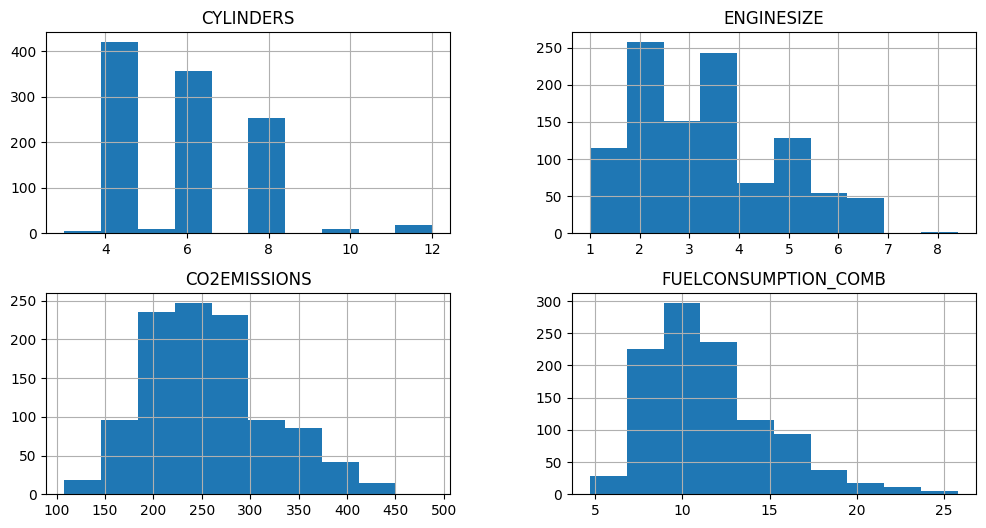

In [10]:
plt.rcParams['figure.figsize'] = (12,6)

viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

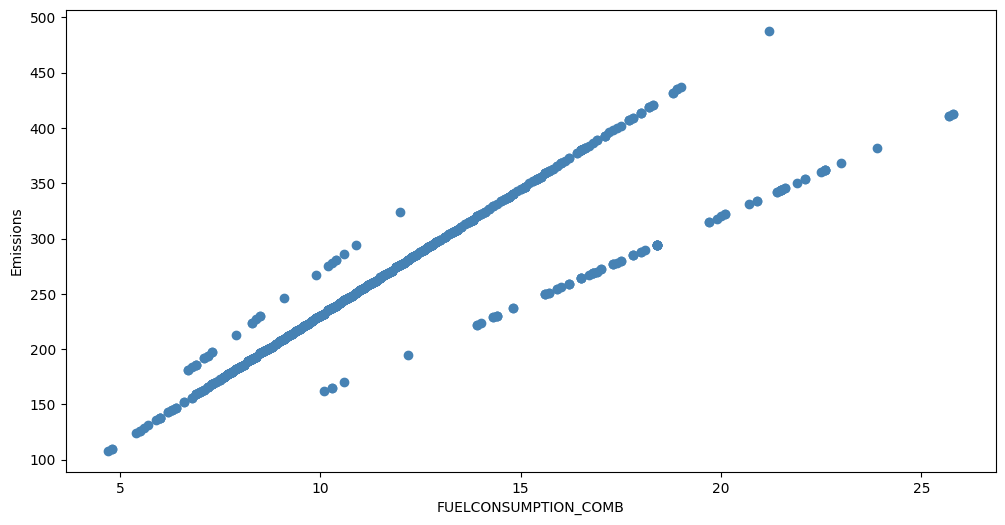

In [11]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color="steelblue")
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emissions")
plt.show()

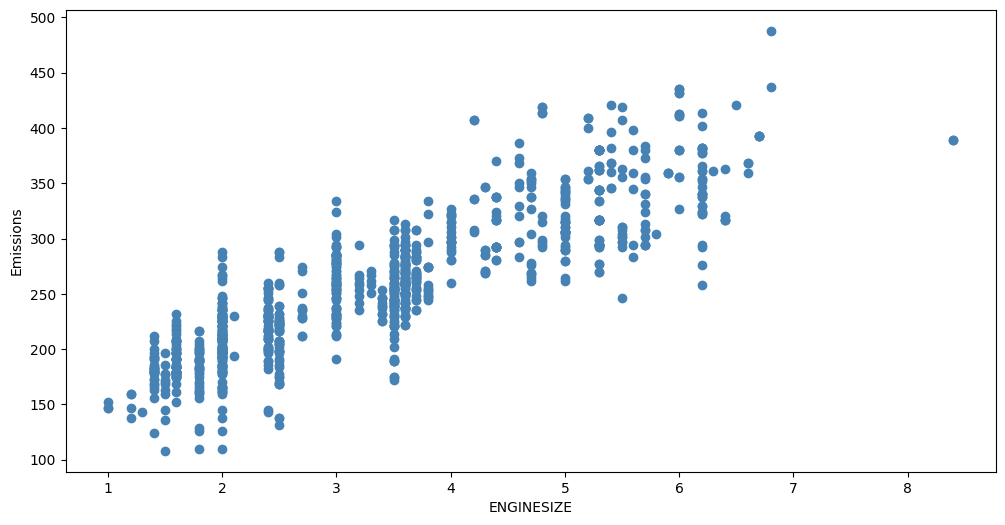

In [12]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="steelblue")
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

<Axes: xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

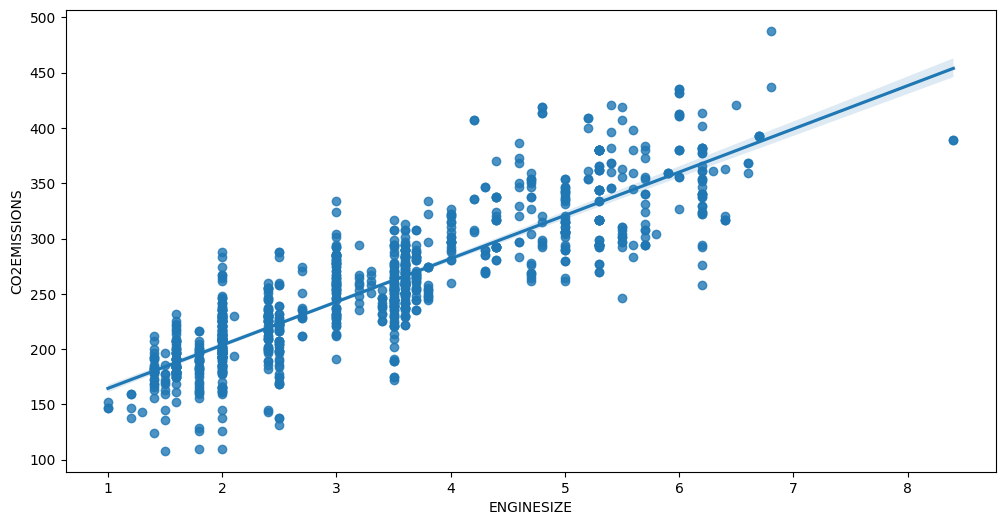

In [13]:
import seaborn as sns

sns.regplot(x=df['ENGINESIZE'], y=df['CO2EMISSIONS'])

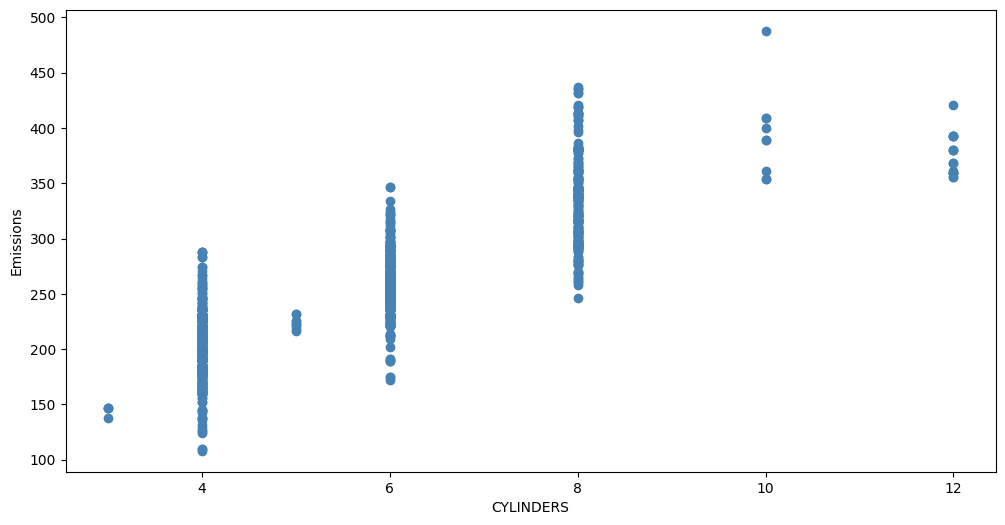

In [14]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color="steelblue")
plt.xlabel("CYLINDERS")
plt.ylabel("Emissions")
plt.show()

In [15]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

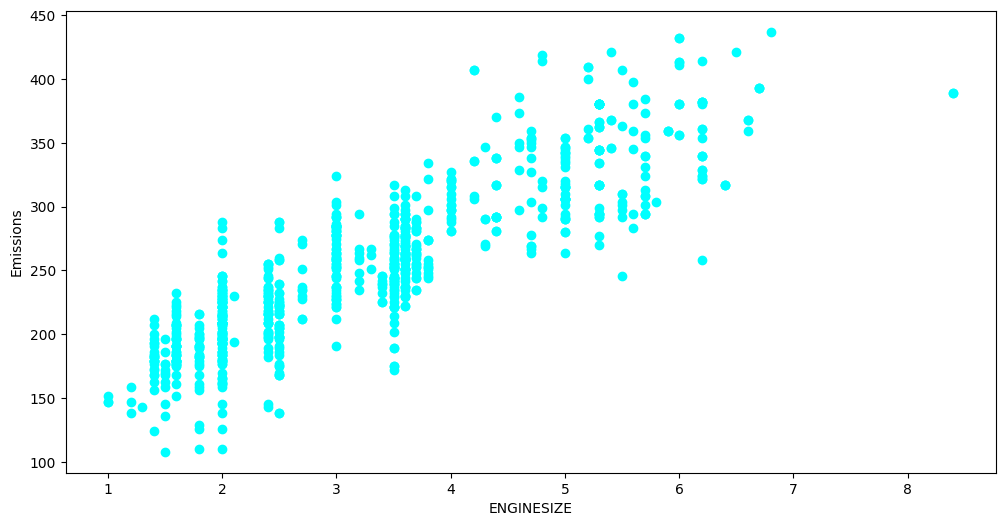

In [16]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="cyan")
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

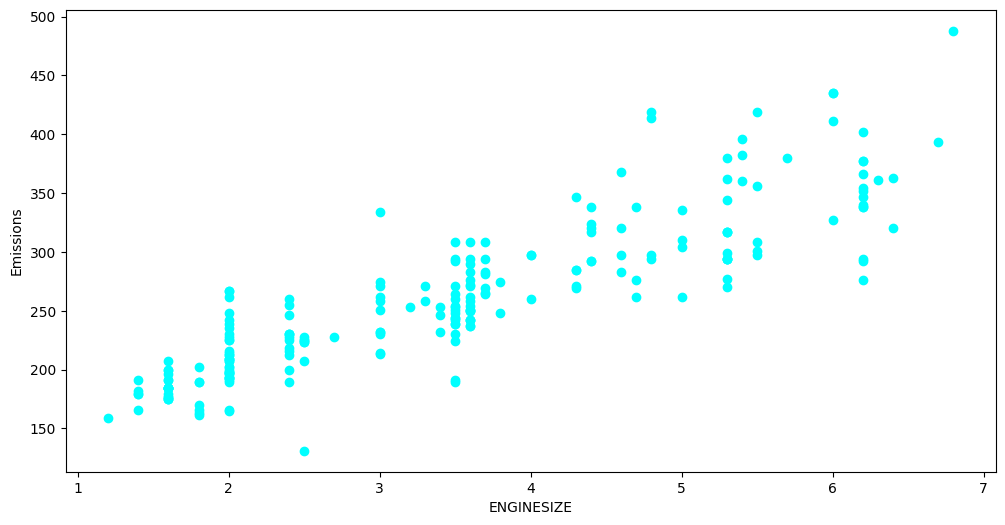

In [17]:
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color="cyan")
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [18]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

regr.fit(train_x, train_y)

LinearRegression()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [19]:
print(regr.coef_)
print(regr.intercept_)

[[39.4910957]]
[124.28899536]


## Model evaluation metrics:

- Mean Absolute Error
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)

In [20]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

In [21]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 22.99
Residual sum of squares (MSE): 983.65
R2-score: 0.76


In [ ]:
# TODO
# Calculate values for FUELCONSUMPTION_COMB
# Use scikit-learn to implement Multiple Linear Regression
# Create a model, train it, test it and use the model

## Simple regression formula

y ̂ = θ0 + θ1 x1 y = a + b * x

y = mx + b y = regr.coef_ * x + intercept_

CO2EMISSIONS = regr.coef_ * ENGINESIZE + intercept_

Text(0, 0.5, 'Emission')

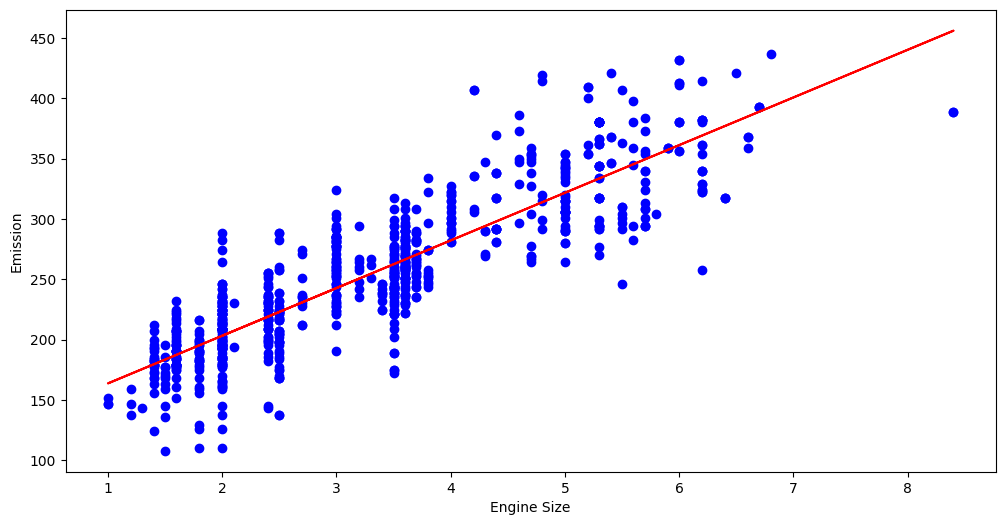

In [22]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="blue")
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine Size")
plt.ylabel("Emission")

Mean Absolute Error (MAE), Mean Squared Error (MSE) ve Root Mean Squared Error (RMSE) regresyon modellerinin performansını değerlendirmek için kullanılan üç yaygın metriktir.

MAE:

MAE, modelin tahminlerinin gerçek değerlerden ne kadar sapma gösterdiğini ölçen bir metriktir.
Her bir gözlem için gerçek değer ile tahmin arasındaki mutlak farkların ortalaması alınır.
Daha küçük bir MAE, modelin daha iyi performans gösterdiğini gösterir.

MSE:

MSE, gerçek değerler ile tahminler arasındaki farkların karesinin ortalamasını alır.
Hata kareleri kullanıldığı için büyük sapmalar daha fazla ağırlık taşır ve bu nedenle daha büyük hatalar daha belirgin hale gelir.

RMSE:

RMSE, MSE'nin karekökü alınarak elde edilir. Bu, hataların orijinal ölçü biriminde ifade edilmesini sağlar.
Daha küçük bir RMSE, modelin daha iyi performans gösterdiğini gösterir.
Bu metrikler, regresyon modellerinin performansını ölçmek için kullanılır. RMSE, hataların orijinal ölçü biriminde ifade edilmesi açısından MSE'ye tercih edilebilir. Her üç metrik de modelin performansını değerlendirmek için kullanılabilir, ancak veri setine ve probleme bağlı olarak tercih edilebilecek farklı ölçütlerdir.

## Model evaluation metrics:

- Mean Absolute Error
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)

In [23]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

In [24]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 22.99
Residual sum of squares (MSE): 983.65
R2-score: 0.76


In [ ]:
# TODO
# Calculate values for FUELCONSUMPTION_COMB
# Use scikit-learn to implement Multiple Linear Regression
# Create a model, train it, test it and use the model

## first data set

Mean absolute error: 23.56 Residual sum of squares (MSE): 974.39 R2-score: 0.76

## Multiple Linear Regression

In [25]:
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


## formula 

y = m0 ENGINESIZE + b0 + m1 CYLINDERS + b1 ... + mn xn + bn

## TODO fix formula


CO2EMISSIONS = regr.coef_ * ENGINESIZE + intercept_ ... +

CO2EMISSIONS = 125 + 7.5 * ENGINESIZE + 15 * CYLINDERS + ...

y = 150 196-150 = 46 "residual error"

Calculate MSE value for model accuracy

How to estimate multiple linear regression parameters?

How to estimate θ?

Ordinary Least Squares:

Takes long time for large datasets (10K+ rows)
An optization algorithm

Gradient Descent

In [26]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [27]:
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


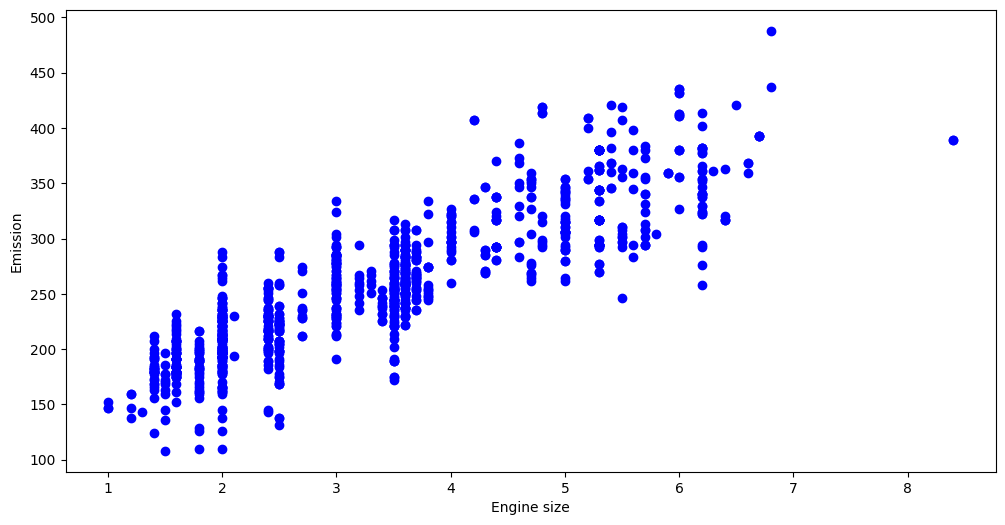

In [28]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [29]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

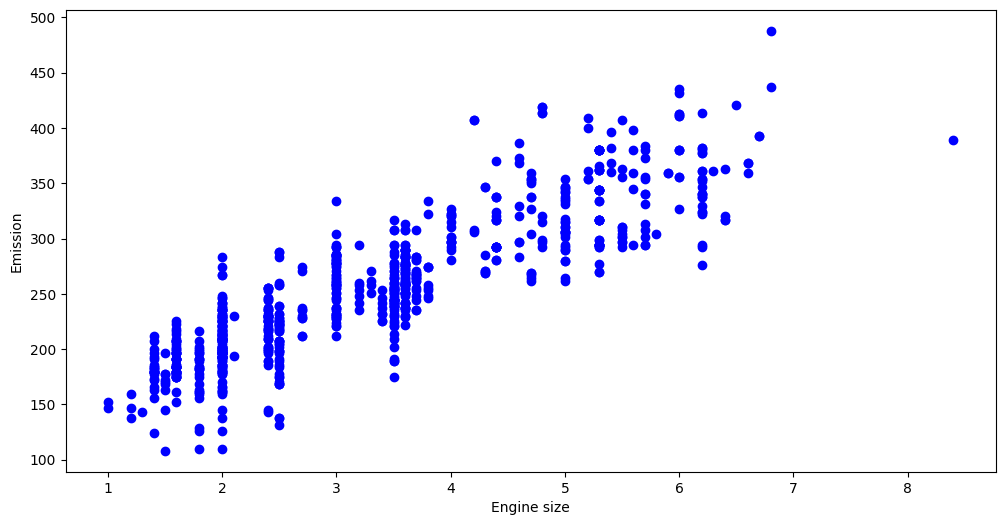

In [30]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [31]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])

regr.fit(x, y)

LinearRegression()

In [32]:
print('Coefficients:', regr.coef_)

Coefficients: [[10.42588819  7.82722435  9.57292613]]


In [33]:
# Prediction

y_hat = regr.predict(np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]))
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])

print("Mean Squared Error (MSE) : %.2f"
      % np.mean((y_hat - y) ** 2))

print('Variance score: %.2f' % regr.score(x, y)) # explained variance, best score is 1.0

Mean Squared Error (MSE) : 475.59
Variance score: 0.87


In [ ]:
# TODO 
# How to use Mean Squared Error (MSE) in multiple regression

In [ ]:
# Practice
# Use a multiple linear regression with the same data , use FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY instead of FUELCONSUMPTION_COMB
# Does it result with better accuracy

## TODO

In [35]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]


In [37]:
from sklearn import linear_model

In [39]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x,y)

LinearRegression()

In [47]:
print(regr.coef_)

[[10.96216581  7.52348619  0.45034371  9.00769155]]


In [45]:
y_hat = regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_COMB']])   
y = np.asanyarray(test[['CO2EMISSIONS']])

              

c:\Users\victus\Documents\data.project\.conda\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [46]:
print("Mean Squared Error (MSE) : %.2f"
      % np.mean((y_hat - y) ** 2))

print('Variance score: %.2f' % regr.score(x, y)) 

Mean Squared Error (MSE) : 528.19
Variance score: 0.86
